In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import PIL.ImageOps  
import numpy as np

In [ ]:
FJoin = os.path.join

In [ ]:
f_data_final = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
print(f_data_final)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [ ]:
data_train_drive_link = '/content/drive/MyDrive/csvdata_HOG_notargument/Dataframe_training_final_HOG.csv'
label_train_drive_link = '/content/drive/MyDrive/csvdata_HOG_notargument/Labelframe_training_final_HOG.csv'

data_test_drive_link = '/content/drive/MyDrive/csvdata_HOG_notargument/Dataframe_testing_final_HOG.csv'
label_test_drive_link = '/content/drive/MyDrive/csvdata_HOG_notargument/Labelframe_testing_final_HOG.csv'

In [ ]:
def read_data(link_data, link_label):
    data = pd.read_csv(link_data, header=None)
    label = pd.read_csv(link_label, header=None)
    return np.array(data), np.array(label).ravel()

In [ ]:
data_train, label_train = read_data(data_train_drive_link, label_train_drive_link)
data_test, label_test = read_data(data_test_drive_link, label_test_drive_link)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score,precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
import math
from sklearn.neural_network import MLPClassifier

In [ ]:
def change_to_char(num):
  listchar = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
  listnum = [i for i in range(0,89)]
  if (num >= 0 and num <= 88):
    k = listnum.index(num)
    return listchar[k]
  else:
    return -1

In [ ]:
img = cv2.imread('/content/drive/MyDrive/pic_noArgument/datatrain_16x20/a/pic_10.jpg')
img.shape

(20, 16, 3)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dropout
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

data_train = data_train.reshape((data_train.shape[0], 20, 16, 1)).astype('float32')
data_test = data_test.reshape((data_test.shape[0], 20, 16, 1)).astype('float32')

print(data_train.shape) 

label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)

print(label_test.shape)

num_classes = label_test.shape[1]

print(num_classes)

(19229, 20, 16, 1)
(4449, 89)
89


In [ ]:
data_train.shape

(19229, 20, 16, 1)

In [ ]:
label_train.shape

(19229, 89)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 2), input_shape=(20, 16, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 2), input_shape=(20, 16, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 2), activation='relu', data_format="channels_last", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 2), activation='relu', data_format="channels_last", padding="same"))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(data_train, label_train, validation_data=(data_test, label_test), epochs=10, batch_size=19, verbose=2)

Epoch 1/10
1013/1013 - 34s - loss: 1.8845 - accuracy: 0.4990 - val_loss: 1.8386 - val_accuracy: 0.4931
Epoch 2/10
1013/1013 - 31s - loss: 0.9297 - accuracy: 0.7206 - val_loss: 1.3126 - val_accuracy: 0.6372
Epoch 3/10
1013/1013 - 31s - loss: 0.6959 - accuracy: 0.7857 - val_loss: 1.2109 - val_accuracy: 0.6678
Epoch 4/10
1013/1013 - 31s - loss: 0.5650 - accuracy: 0.8237 - val_loss: 1.2705 - val_accuracy: 0.6651
Epoch 5/10
1013/1013 - 31s - loss: 0.4839 - accuracy: 0.8467 - val_loss: 1.2143 - val_accuracy: 0.6811
Epoch 6/10
1013/1013 - 31s - loss: 0.4300 - accuracy: 0.8621 - val_loss: 1.2309 - val_accuracy: 0.6822
Epoch 7/10
1013/1013 - 31s - loss: 0.3806 - accuracy: 0.8748 - val_loss: 1.2681 - val_accuracy: 0.6903
Epoch 8/10
1013/1013 - 31s - loss: 0.3342 - accuracy: 0.8881 - val_loss: 1.3122 - val_accuracy: 0.6880
Epoch 9/10
1013/1013 - 31s - loss: 0.3184 - accuracy: 0.8942 - val_loss: 1.2663 - val_accuracy: 0.7058
Epoch 10/10
1013/1013 - 31s - loss: 0.2866 - accuracy: 0.9036 - val_loss:

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_97 (ModuleWra (None, 20, 16, 32)        224       
_________________________________________________________________
module_wrapper_98 (ModuleWra (None, 20, 16, 32)        128       
_________________________________________________________________
module_wrapper_99 (ModuleWra (None, 20, 16, 32)        6176      
_________________________________________________________________
module_wrapper_100 (ModuleWr (None, 20, 16, 32)        128       
_________________________________________________________________
module_wrapper_101 (ModuleWr (None, 10, 8, 32)         0         
_________________________________________________________________
module_wrapper_102 (ModuleWr (None, 10, 8, 32)         0         
_________________________________________________________________
module_wrapper_103 (ModuleWr (None, 10, 8, 64)        

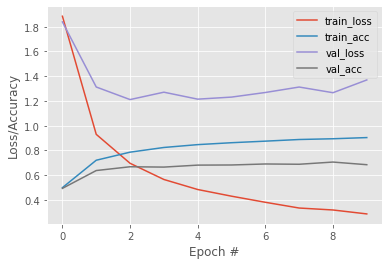

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
f_data_final = np.asarray(f_data_final)

last = []
for i in f_data_final:
  temp = []
  if (i == 'a'):
    temp = ['a']*49
  else:
    temp = [i]*50
  last.append(temp)

test_array = []
for i in last:
  for j in i:
    test_array.append(j)

In [ ]:
predicted = model.predict(data_test).argmax(axis=1)

In [ ]:
pred_array = []
for i in predicted:
  pred_array.append(f_data_final[i])

In [ ]:
data_test2, label_test2 = read_data(data_test_drive_link, label_test_drive_link)

In [ ]:
print(classification_report(predicted, label_test2, target_names=f_data_final))

              precision    recall  f1-score   support

           a       0.94      1.00      0.97        46
          à       0.78      0.91      0.84        43
          á       0.68      0.60      0.64        57
          â       0.50      0.81      0.62        31
         ầ       0.62      0.82      0.70        38
         ấ       0.42      0.58      0.49        36
         ẫ       0.42      0.55      0.48        38
         ẩ       0.42      0.54      0.47        39
          ã       0.52      0.58      0.55        45
          ă       0.58      0.72      0.64        40
         ằ       0.72      0.69      0.71        52
         ắ       0.50      0.57      0.53        44
         ẵ       0.48      0.73      0.58        33
         ẳ       0.62      0.53      0.57        59
          ả       0.82      0.77      0.80        53
          ạ       0.88      0.86      0.87        51
         ậ       0.44      0.81      0.57        27
         ặ       0.72    

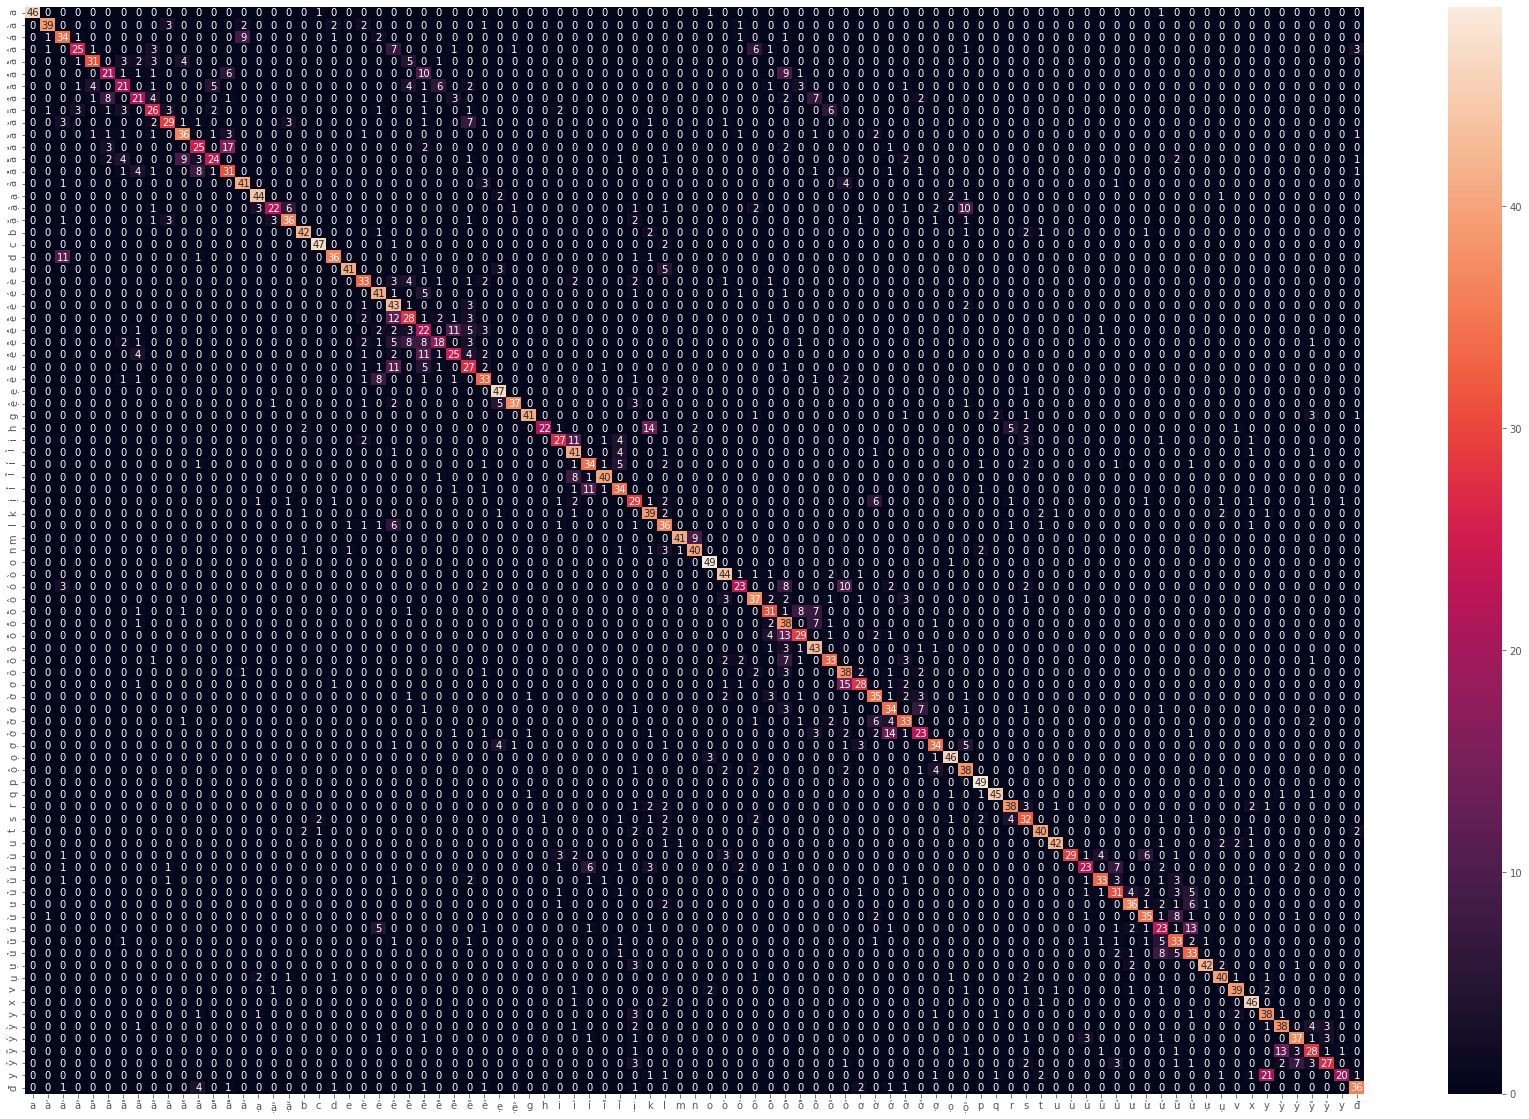

In [ ]:
import seaborn as sns
cm=confusion_matrix(test_array, pred_array)
df_cm = pd.DataFrame(cm, f_data_final, f_data_final)
plt.figure(figsize = (30, 20))
sns.heatmap(df_cm, annot=True)